In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget

In [2]:
import numpy as np
import umap
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bioAI.mplstyle')

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)
#board += center

gridmodule = GridModule(center,orientation_offset,f,non_negative=False,add=True)

In [4]:
phases = gridmodule.inner_hexagon.sample(3,seed=3)
gridmodule.init_module(phases)
ratemaps = gridmodule(board)
masked_ratemaps = gridmodule.masked_ratemaps(board)
phases.shape, ratemaps.shape

((3, 2), (3, 64, 64))

(<Figure size 300x300 with 1 Axes>, <AxesSubplot:>)

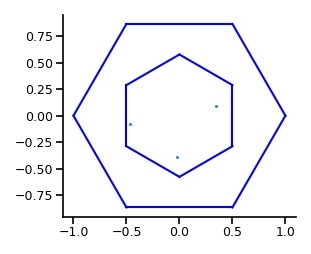

In [5]:
gridmodule.plot(figsize=(2,2))

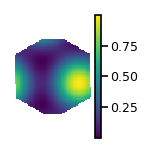

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(masked_ratemaps[0])
plt.axis('off')
plt.colorbar()

In [7]:
# Create activity mesh
activity_range = [0,1]
res = 64
acitivity_mesh = np.meshgrid(*[np.linspace(*activity_range, res)]*len(phases))
acitivity_mesh = np.stack(acitivity_mesh, axis=-1)

In [27]:
masked_ratemaps[masked_ratemaps.mask]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

In [ ]:
def activity_histogram